# Artificial Neural Network

### Importing the libraries

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [145]:
tf.__version__

'2.4.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [146]:
data = pd.read_csv('/Churn_Modelling.csv')

In [147]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3409,3410,15593736,Cook,598,Germany,Female,46,7,131769.04,1,0,0,184980.23,1
3451,3452,15700864,Fiorentini,607,France,Female,21,0,0.00,2,1,0,116106.52,0
2865,2866,15590228,Greenwalt,715,France,Male,21,6,76467.16,1,1,1,173511.72,0
7262,7263,15579583,Hall,641,Spain,Female,40,4,101090.27,1,1,1,51703.09,0
5146,5147,15628992,Esposito,850,Germany,Male,32,2,128647.98,2,0,0,54416.18,0


In [148]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [150]:
x = data.iloc[:,3:-1].values
y = data.iloc[:,-1].values

In [151]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [152]:
print(y)

[1 0 1 ... 1 1 0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


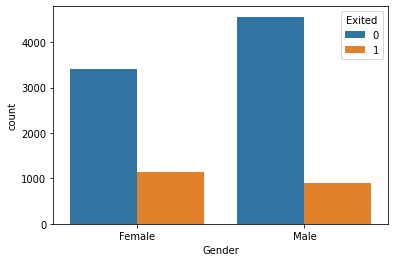

In [153]:
sns.countplot(data.Gender,hue=data.Exited)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


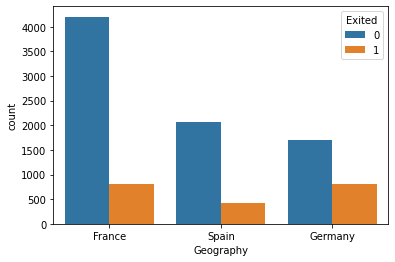

In [252]:
sns.countplot(data.Geography,hue=data.Exited)

In [154]:
left   = data[data.Exited == 1]
stayed = data[data.Exited == 0]

In [155]:
left.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2037.000000,2.037000e+03,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,2866.855245,7.269262e+04,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,1.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,2419.000000,1.562736e+07,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,4871.000000,1.568896e+07,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,7404.000000,1.575309e+07,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,9999.000000,1.581566e+07,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


In [156]:
stayed.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7963.000000,7.963000e+03,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,2891.682053,7.174423e+04,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,2.000000,1.556570e+07,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,2526.500000,1.562882e+07,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,5042.000000,1.569154e+07,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,7525.500000,1.575335e+07,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


### Encoding categorical data

Label Encoding the "Gender" column

In [157]:
x.shape

(10000, 10)

In [158]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])

One Hot Encoding the "Geography" column

In [159]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [160]:
#x = x[:,1:]

In [161]:
print(f'left : {len(left)/len(data)}\n')
print(f'stayed : {len(stayed)/len(data)}\n')

left : 0.2037

stayed : 0.7963



### Splitting the dataset into the Training set and Test set

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

### Feature Scaling

In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [165]:
ann = Sequential()

### Adding the input layer and the first hidden layer

In [166]:
ann.add(Dense(units=6,activation='relu'))

### Adding the second hidden layer

In [167]:
ann.add(Dense(units=6,activation='relu'))

### Adding the output layer

In [168]:
ann.add(Dense(units=1,activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [169]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Training the ANN on the Training set

In [ ]:
ann.fit(x_train,y_train,batch_size=32,epochs=30)

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

In [188]:
x_new = np.array([[600,'France',le.transform(['Male'])[0],40,3,60000,2,1,1,50000]])
x_new

array([['600', 'France', '1', '40', '3', '60000', '2', '1', '1', '50000']],
      dtype='<U21')

In [189]:
x_new = ct.transform(x_new)

In [193]:
x_new = sc.transform(x_new)

In [199]:
print(ann.predict(x_new) > 0.5)

[[False]]


**Solution**

In [174]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [ ]:
_ , acc = ann.evaluate(x_test,y_test,verbose=0)
print(f'Accuracy = {acc*100}%')

Accuracy = 85.79999804496765%


### Making the Confusion Matrix

In [202]:
from sklearn.metrics import confusion_matrix

In [217]:
y_pred = ann.predict(x_test)
y_pred = (y_pred>0.5)

In [231]:
mx = np.column_stack((y_test,y_pred))
pd.DataFrame(mx,columns=['true','predicted']).sample(10)

,true,predicted
1722,0,0
992,0,0
1809,0,0
1652,1,1
467,0,0
765,0,0
967,0,0
129,0,0
664,0,0
727,0,0


In [240]:
cm = confusion_matrix(y_test,y_pred)

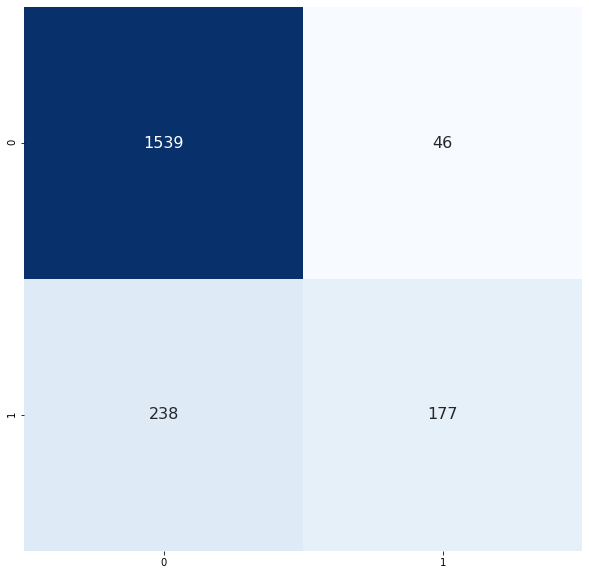

In [250]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,cmap='Blues',cbar=False,annot=True,annot_kws={"size": 16},fmt='g')
plt.show()